# Logistic Regression:

La regresión logística es un algortimo de Machine Learning que se utiliza para clasificación. Consiste en analizar un conjunto de datos en el que hay una o más variables independientes que determinan un resultado. El resultado se mide con una variable dicotómica, en la que sólo hay dos resultados posibles, en este caso el pago o impago del crédito.

- Library Import
- Data Import
- Model Definition
- Model Training
- Confussion Matrix & Accuracy
- ROC Curve
- References


__Importamos todas las librerías que se van a utilizar en este notebook:__

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt # plots
import seaborn as sns # plots
from sklearn.ensemble import IsolationForest
from sklearn import preprocessing 
from sklearn.linear_model import Lasso, LassoCV
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression # Log Regression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import datasets, metrics, model_selection

__Importamos los datos:__

In [2]:
X_train = pd.read_csv('../data/03_processed/x_train.csv')
X_train.head(1)

,Unnamed: 0,num_tl_30dpd,tot_hi_cred_lim,revol_bal,purpose_debt_consolidation,home_ownership_ANY,max_bal_bc,total_cu_tl,open_rv_24m,num_tl_120dpd_2m,...,purpose_housing,mths_since_recent_revol_delinq,total_bal_ex_mort,num_sats,home_ownership_MORTGAGE,mths_since_last_record,pub_rec,delinq_amnt,num_bc_tl,mths_since_rcnt_il
0,0,0.0,0.019016,0.005816,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.005681,0.1,1.0,1.0,0.0,0.0,0.114286,1.0


In [3]:
del X_train['Unnamed: 0']  # eliminamos la primera columna que se ha añadido

In [7]:
X_test = pd.read_csv('../data/03_processed/x_test.csv')
X_test.head(1)

,Unnamed: 0,num_tl_30dpd,tot_hi_cred_lim,revol_bal,purpose_debt_consolidation,home_ownership_ANY,max_bal_bc,total_cu_tl,open_rv_24m,num_tl_120dpd_2m,...,purpose_housing,mths_since_recent_revol_delinq,total_bal_ex_mort,num_sats,home_ownership_MORTGAGE,mths_since_last_record,pub_rec,delinq_amnt,num_bc_tl,mths_since_rcnt_il
0,137093,0.0,0.005378,0.004647,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.272222,0.011176,0.077778,0.0,1.0,0.0,0.0,0.1,1.0


In [8]:
del X_test['Unnamed: 0']  # eliminamos la primera columna que se ha añadido

In [9]:
Y_train = pd.read_csv('../data/03_processed/y_train.csv')
Y_train.head(1)

,Unnamed: 0,target
0,0,0.0


In [10]:
del Y_train['Unnamed: 0']  # eliminamos la primera columna que se ha añadido

In [11]:
Y_test = pd.read_csv('../data/03_processed/y_test.csv')
Y_test.head(1)

,Unnamed: 0,target
0,137093,0.0


In [12]:
del Y_test['Unnamed: 0']  # eliminamos la primera columna que se ha añadido

Definimos la función logaritmica para nuestro modelo:

In [15]:

%%time

#función del modelo:
logit_model = LogisticRegression(random_state = 40,
                                 solver = "saga",
                                 penalty = "l1", 
                                 class_weight = "balanced", 
                                 C = 1.0, 
                                 max_iter = 500)

# entrenamos el modelo con los datos train
logit_model.fit(X_train, Y_train)


#predecimos los datos de 'target' para los datos TEST
pred_logit = logit_model.predict(X_test)

C:\Users\Beatriz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Wall time: 12.2 s


### Matriz de Confusión:
La matriz de confusión de un problema de clase n es una matríz nxnen la que las filas se nombran según las clases reales y las columnas, según las clases previstas por el modelo. Sirve para mostrar de forma explícita cuándo una clase es confundida con otra

__Accuracy:__ Es el porcentaje total de elementos clasificados correctamente.

In [16]:
# Función de la matriz de confusion:

def conf_matrix(Y_test, Y_pred): # va a comparar los resultados de las predicciones de la variable target vs la real del testset
    cnf_matrix_tra = confusion_matrix(Y_test, Y_pred)
    conf_plot = sns.heatmap(cnf_matrix_tra, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_title("Confusion matrix, without normalization")
    conf_plot.set_ylabel('True Label')
    conf_plot.set_xlabel('Predicted Label');

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93     69140
         1.0       0.74      0.88      0.81     23299

    accuracy                           0.89     92439
   macro avg       0.85      0.89      0.87     92439
weighted avg       0.90      0.89      0.90     92439



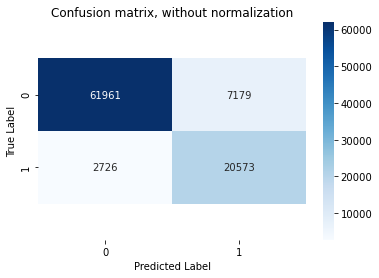

In [17]:
pred_logit = logit_model.predict(X_test)
conf_matrix(Y_test, pred_logit)
print(classification_report(Y_test, pred_logit))

### Curva ROC:

Una curva ROC (curva de característica operativa del recepto) es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva representa dos parámetros:
 - Tasa de verdaderos positivos
 - Tasa de falsos positivos
 
__El AUC__ proporciona una medición agregada del rendimiento en todos los umbrales de clasificación posibles. Una forma de interpretar el AUC es como la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio.

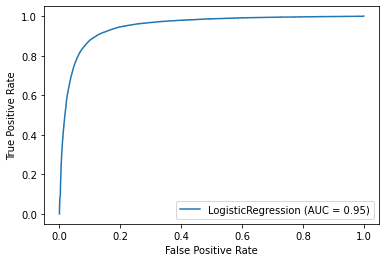

Logistic Regression score train:  0.8938107987966878
Logistic Regression score:  0.8928482566881943


In [16]:
metrics.plot_roc_curve(logit_model, X_test, Y_test)                             # CURVA ROC
plt.show()                     
print("Logistic Regression score train: ", logit_model.score(X_train, Y_train)) # score train
print("Logistic Regression score: ", logit_model.score(X_test, Y_test))         # score test

__Guardamos el modelo entrenado para poder volver a utilizarlo más adelante y que ya esté entrenado:__

In [17]:
# función para guardar el modelo
def save_models(filename, model):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [18]:
save_models('../data/04_models/logit_model.pkl', logit_model) # ruta y modelo guradado IMP .plk

### Referencias:

- https://empresas.blogthinkbig.com/ml-a-tu-alcance-matriz-confusion/
- https://www.juanbarrios.com/la-matriz-de-confusion-y-sus-metricas/
- https://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python
- https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
- https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8